In [367]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [368]:

netflix_df = pd.read_csv('netflix_titles.csv', parse_dates=['date_added'])


In [369]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [370]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [371]:
netflix_df.country.mode()[0]

'United States'

In [372]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])


In [373]:
netflix_df = netflix_df.dropna(subset=['date_added', 'rating', 'duration'])

In [374]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          7965 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


## Documentation
1. Researched into the dataset on kaggle 
2. loaded the data into a jupyter notebook for data exploration 
3. cleaned data 
    - transforming date in datetime object so that time series plotting is possible 
    - we found that column [director] and [cast] has a particular large amount of null values, but we decided to keep them in because this colunmn will not be heavily utilised (possible improvement: find missing data) but can still be intresting for certain persons 
    - missing values in [country] was replaced by the mode (United States)
    - rows that had missing values in either [date_added], [rating] or [duration] columns were dropped because they are either a ciritical dimension
    - learned more about age ranking and standardized it to the US system 
    - transfrom listed_in into columns for faster processing (acts as a dimension)
    - transfrom duration of TV shows to an integer 
    - transfrom countries into binary because it can also be a joint venture between two countries

Challenges 
- dealing with outliers (Movies are US Biased)



In [375]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [376]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [377]:
age_mapping = {'TV-MA': 'R', 'TV-14': 'PG-13', 'TV-PG': 'PG', 'TV-Y': 'PG', 'TV-Y7':'PG',
       'TV-G':'G', 'TV-Y7-FV': 'PG', 'UR':'NR'}

In [378]:
netflix_df['rating'] = netflix_df.rating.apply(lambda x: age_mapping[x] if x in age_mapping else x)

In [379]:
netflix_df.rating.unique()

array(['PG-13', 'R', 'PG', 'G', 'NC-17', 'NR'], dtype=object)

In [380]:
netflix_df.shape 

(8790, 12)

In [381]:
netflix_df['genre'] = netflix_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [382]:
all_genre = list(); 
for i in range(netflix_df.shape[0]): 
    for index, j in enumerate(netflix_df.iloc[i].genre): 
        all_genre.append(netflix_df.iloc[i].genre[index])


In [383]:
set_genre = set(all_genre)
print(set_genre)

{'TV Dramas', 'TV Sci-Fi & Fantasy', 'Thrillers', 'Reality TV', 'Music & Musicals', 'TV Mysteries', 'Anime Series', 'International Movies', 'LGBTQ Movies', 'Stand-Up Comedy', 'Classic Movies', 'Cult Movies', 'Independent Movies', 'Classic & Cult TV', 'Sci-Fi & Fantasy', 'Anime Features', 'Action & Adventure', 'Comedies', 'Sports Movies', 'International TV Shows', 'British TV Shows', 'Documentaries', 'Crime TV Shows', 'TV Thrillers', 'Docuseries', 'Teen TV Shows', 'Movies', 'Stand-Up Comedy & Talk Shows', 'Science & Nature TV', 'Horror Movies', 'Spanish-Language TV Shows', 'Romantic Movies', 'Dramas', "Kids' TV", 'TV Comedies', 'TV Action & Adventure', 'Korean TV Shows', 'Children & Family Movies', 'Romantic TV Shows', 'Faith & Spirituality', 'TV Horror', 'TV Shows'}


In [384]:
netflix_df.genre = [','.join(map(str, l)) for l in netflix_df['genre']]

In [385]:
binary_genre = netflix_df['genre'].str.get_dummies(sep=',')


In [386]:
netflix_df = netflix_df.join(binary_genre) 

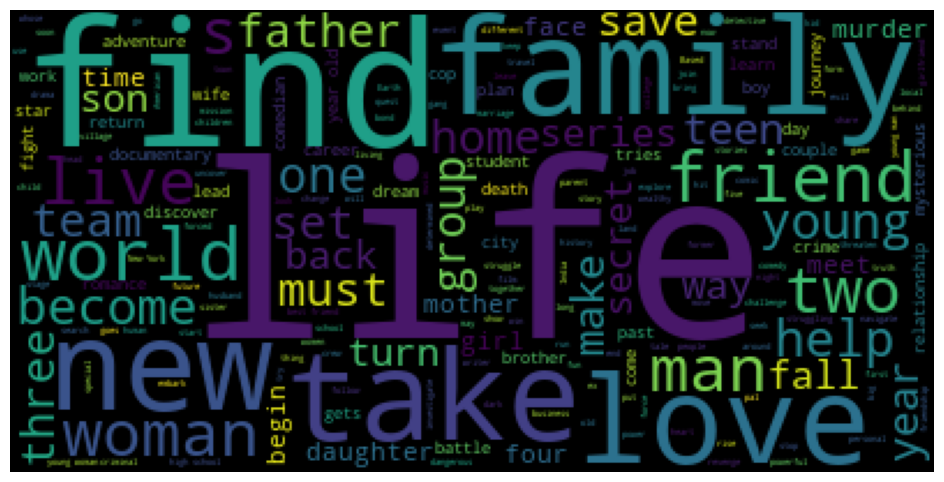

In [387]:
text = ' '.join(netflix_df.description.dropna().values)
wordcloud = WordCloud(background_color = 'black').generate(text)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [388]:
netflix_df['duration_t'] = netflix_df['duration'].str.extract('(\d+)').astype(int)

In [392]:
netflix_df.date_added.max()

Timestamp('2021-09-25 00:00:00')

In [393]:
import datetime 
today = netflix_df.date_added.max()
one_year_ago = pd.to_datetime(today.replace(year=today.year - 1))
netflix_df['date_added_dt'] = pd.to_datetime(netflix_df['date_added'])
last_year_df = netflix_df[netflix_df['date_added_dt'] < one_year_ago]

In [394]:
last_year_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,duration_t,date_added_dt
1957,s1958,Movie,Real Steel,Shawn Levy,"Hugh Jackman, Dakota Goyo, Evangeline Lilly, A...","United States, India",2020-09-24,2011,PG-13,127 min,...,0,0,0,0,0,0,0,0,127,2020-09-24
1958,s1959,TV Show,The Chef Show,NaN,"Jon Favreau, Roy Choi",United States,2020-09-24,2020,R,4 Seasons,...,0,0,0,0,0,0,0,0,4,2020-09-24
1959,s1960,Movie,Enola Holmes,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...",United Kingdom,2020-09-23,2020,PG-13,124 min,...,0,0,0,0,0,0,0,0,124,2020-09-23
1960,s1961,Movie,Kiss the Ground,"Joshua Tickell, Rebecca Harrell Tickell",Woody Harrelson,United States,2020-09-22,2020,G,85 min,...,0,0,0,0,0,0,0,0,85,2020-09-22
1961,s1962,TV Show,The Playbook,NaN,NaN,United States,2020-09-22,2020,R,1 Season,...,0,0,0,0,0,0,0,0,1,2020-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,0,0,0,0,0,0,0,1,158,2019-11-20
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,2019-07-01,2018,PG,2 Seasons,...,0,0,0,0,0,0,0,0,2,2019-07-01
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,0,0,0,0,0,0,0,0,88,2019-11-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,0,0,0,0,0,0,0,0,88,2020-01-11


In [395]:
binary_country= netflix_df['country'].str.get_dummies(sep=',')


In [397]:
netflix_df = netflix_df.join(binary_country) 

In [398]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,0,0,0,0,1,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,R,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,R,1 Season,...,0,0,0,0,1,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,R,1 Season,...,0,0,0,0,1,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,R,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,0,0,0,0,1,0,0,0,0,0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,2019-07-01,2018,PG,2 Seasons,...,0,0,0,0,1,0,0,0,0,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,0,0,0,0,1,0,0,0,0,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,0,0,0,0,1,0,0,0,0,0


In [399]:
netflix_df.to_csv('netflix.csv', sep='\t', encoding='utf-8', index = False)

In [412]:
netflix_df.columns[57]

' Afghanistan'

In [413]:
countries = netflix_df.columns[57:]

In [422]:
geo =netflix_df[countries].sum().to_frame()
geo[1]

KeyError: 1

In [424]:
netflix_df.date_added_dt.max()

Timestamp('2021-09-25 00:00:00')

In [428]:
time_df = netflix_df.groupby(by=['date_added_dt']).count()

In [429]:
time_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
date_added_dt,,,,,,,,,,,,,,,,,,,,,
2008-01-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2008-02-04,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2009-05-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2009-11-18,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2010-11-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21,5,5,5,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2021-09-22,9,9,9,4,6,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2021-09-23,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [430]:
time_df.index

DatetimeIndex(['2008-01-01', '2008-02-04', '2009-05-05', '2009-11-18',
               '2010-11-01', '2011-05-17', '2011-09-27', '2011-10-01',
               '2012-02-21', '2012-11-14',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-19',
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-25'],
              dtype='datetime64[ns]', name='date_added_dt', length=1713, freq=None)

In [433]:
time_df = netflix_df.groupby(by=['date_added_dt']).count().cumsum()


In [434]:
time_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
date_added_dt,,,,,,,,,,,,,,,,,,,,,
2008-01-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2008-02-04,2,2,2,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2009-05-05,3,3,3,2,2,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2009-11-18,4,4,4,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2010-11-01,5,5,5,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21,8768,8768,8768,6156,7949,8768,8768,8768,8768,8768,...,8768,8768,8768,8768,8768,8768,8768,8768,8768,8768
2021-09-22,8777,8777,8777,6160,7955,8777,8777,8777,8777,8777,...,8777,8777,8777,8777,8777,8777,8777,8777,8777,8777
2021-09-23,8779,8779,8779,6162,7957,8779,8779,8779,8779,8779,...,8779,8779,8779,8779,8779,8779,8779,8779,8779,8779


In [438]:
test_df = netflix_df.groupby('country')[['show_id']].count().sort_values(by='show_id',ascending=False).reset_index()[:5]['country']

In [439]:
test_df

0     United States
1             India
2    United Kingdom
3             Japan
4       South Korea
Name: country, dtype: object

In [441]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration',
       ...
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Venezuela', 'Vietnam', 'West Germany',
       'Zimbabwe'],
      dtype='object', length=253)

In [445]:
netflix_df['year_nf'] = netflix_df['date_added'].dt.year

/var/folders/m4/5xc1q57n4glbgc0_89kdvkx40000gn/T/ipykernel_28217/2661535665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_countries['nf_release_year'] = top5_countries['date_added'].dt.year
/var/folders/m4/5xc1q57n4glbgc0_89kdvkx40000gn/T/ipykernel_28217/2661535665.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diff_released_added = top5_countries.groupby('country')['release_year','nf_release_year'].mean().round()


Text(0.76, 0.175, 'hinzugefügt')

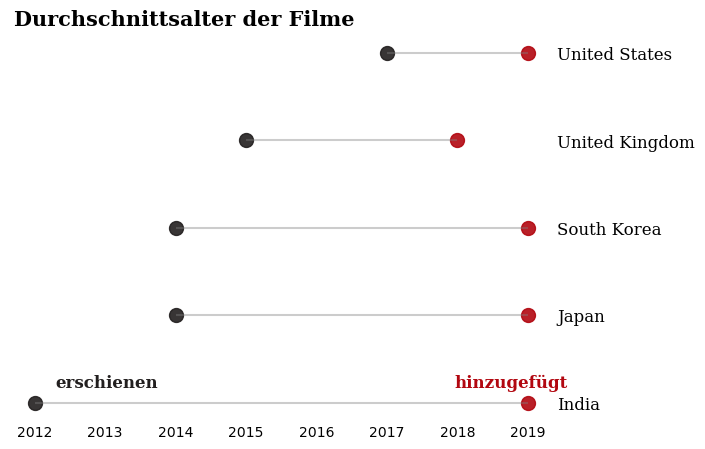

In [461]:
#Data preperation for release - added gap analysis 

t5_countries_grouped = netflix_df.groupby('country')[['show_id']].count().sort_values(by='show_id',ascending=False).reset_index()[:5]
t5_series = t5_countries_grouped['country']
top5_countries = netflix_df.loc[netflix_df['country'].isin(t5_series)]

top5_countries['nf_release_year'] = top5_countries['date_added'].dt.year
diff_released_added = top5_countries.groupby('country')['release_year','nf_release_year'].mean().round()
diff_released_added_ordered = diff_released_added.sort_values(by='release_year')
#erstellen einer Zeile für das Jahr in dem die Serie/ der Film hinzugefügt wurde 

my_range=range(1,len(diff_released_added.index)+1)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
content_type = 'Filme'
fig.text(0.13, 0.9, f'Durchschnittsalter der {content_type}', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=diff_released_added_ordered['release_year'], xmax=diff_released_added_ordered['nf_release_year'], color='grey', alpha=0.4)
plt.scatter(diff_released_added_ordered['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(diff_released_added_ordered['nf_release_year'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, diff_released_added.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"erschienen", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"hinzugefügt", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

In [465]:
diff_released_added_ordered

,release_year,nf_release_year
country,,
India,2012.0,2019.0
Japan,2014.0,2019.0
United States,2014.0,2019.0
United Kingdom,2015.0,2018.0
South Korea,2017.0,2019.0


In [471]:
import plotly.graph_objects as go
import pandas as pd

t5_countries_grouped = netflix_df.groupby('country')[['show_id']].count().sort_values(by='show_id',ascending=False).reset_index()[:5]
t5_series = t5_countries_grouped['country']
top5_countries = netflix_df.loc[netflix_df['country'].isin(t5_series)]

top5_countries['nf_release_year'] = top5_countries['date_added'].dt.year
diff_released_added = top5_countries.groupby('country')['release_year','nf_release_year'].mean().round()
diff_released_added_ordered = diff_released_added.sort_values(by='release_year')

my_range=range(1,len(diff_released_added.index)+1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=diff_released_added_ordered['release_year'], y=diff_released_added_ordered.index, mode='markers', 
                          marker=dict(color='#221f1f', size=10), name='Average release date'))
fig.add_trace(go.Scatter(x=diff_released_added_ordered['nf_release_year'], y=diff_released_added_ordered.index, mode='markers',
                          marker=dict(color='#b20710', size=10), name='Average added date'))

fig.add_trace(go.Scatter(x=[diff_released_added_ordered['release_year'], diff_released_added_ordered['nf_release_year']], 
                          y=diff_released_added_ordered.index, mode='lines', line=dict(color='grey', width=1), 
                          showlegend=False))

fig.update_layout(title=f"Durchschnittsalter der Filme", title_font_family='serif', title_font_size=20, 
                  yaxis=dict(tickmode='array', tickvals=diff_released_added_ordered.index, ticktext=diff_released_added.index,
                             tickfont=dict(family='serif', size=12)),
                  xaxis=dict(tickfont=dict(family='serif', size=12)),
                  margin=dict(t=80, l=10, r=10, b=10), 
                  legend=dict(x=0.6, y=0.15, bordercolor='black', borderwidth=1))

fig.show()

/var/folders/m4/5xc1q57n4glbgc0_89kdvkx40000gn/T/ipykernel_28217/692791369.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m4/5xc1q57n4glbgc0_89kdvkx40000gn/T/ipykernel_28217/692791369.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [450]:
top5_countries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe,year_nf,nf_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,0,0,1,0,0,0,0,0,2021,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,R,1 Season,...,0,0,1,0,0,0,0,0,2021,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,R,1 Season,...,0,0,1,0,0,0,0,0,2021,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,R,2 Seasons,...,0,0,0,0,0,0,0,0,2021,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,R,1 Season,...,0,0,1,0,0,0,0,0,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,0,0,1,0,0,0,0,0,2019,2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,2019-07-01,2018,PG,2 Seasons,...,0,0,1,0,0,0,0,0,2019,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,0,0,1,0,0,0,0,0,2019,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,0,0,1,0,0,0,0,0,2020,2020
